# Семинар по градиентному бустингу

## Задачи

#### Задача 1.
Дана выборка с пятью объектами и двумя признаками, задача регрессии:

| Признак 1 | Признак 2 | Ответ |
|-----------|-----------|-------|
| 1         | -1        | 0.3   |
| 2         | 1         | -0.4  |
| 3         | 0         | 0.1   |
| 1         | 0         | 0.2   |
| 2         | -1        | -0.8  |

Мы обучаем градиентный бустинг с квадратичной функцией потерь $L(y, z) = (y-z)^2$. Первый базовый алгоритм выбираем очень простым и константным: $b_0(x) = 0$. На какие целевые переменные будет настраиваться второй базовый алгоритм $b_1(x)$?

#### Задача 2.
Рассмотрми ту же выборку, что в предыдущей задаче.
Мы обучаем градиентный бустинг с функцией потерь $L(y, z) = |y-z|$. Пусть мы уже построили несколько базовых алгоритмов и нашли их веса, получив композицию $b_0(x)+\gamma_1 b_1(x)+\dots + \gamma_3 b_3(x)$. Пусть предсказания этой композиции на объектах обучающей выборки равны (0.2, -0.5, 0.4, 0, -0.3). На какие целевые переменные будет настраиваться пятый базовый алгоритм $b_4(x)$?

#### Задача 3.
Пусть нам даны три объекта обучающей выборки и мы обучаем градиентный бустинг на этих данных для решения задачи регрессии. Мы используем квадратичную функцию потерь: $L(z, y) = (z-y)^2$. Мы уже построили композицию $b_0(x)+\gamma_1 b_1(x)+\dots + \gamma_3 b_3(x)$, которая возвращает предсказания (1, 3, -5) на наших объектах, в то время как правильные ответы на объектах выборки равны (2, 2, -3). Кроме того, мы уже обучили новый базовый алгоритм $b_4(x)$, который возвращает предсказания (0.5, -0.4, 0.1). Найдите оптимальный вес $\gamma_4$ базового алгоритма $b_4(x)$ с точки зрения квадратичной функции потерь.

#### Задача 4.
На какие целевые переменные будет настраиваться градиентный бустинг в задаче классификации с функцией потерь $L(y, z) = \log (1+\exp(-yz))$? Запишите ответ в общем виде (для произвольного базового алгоритма, произвольной выборки).

__Вспомнить из лекции:__
* Что такое сокращение шага в градиентном бустинге? Для чего оно используется?

### Ноутбук про популярные реализации градиентного бустинга

[Ссылка](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/seminars/sem10-gbm.ipynb)

### Практическая часть

Сравним, как ведут себя бустинг и бэггинг с ростом числа базовых алгоритмо, на простых синтетических данных регрессии.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Генерируем данные:

Text(0,0.5,'target')

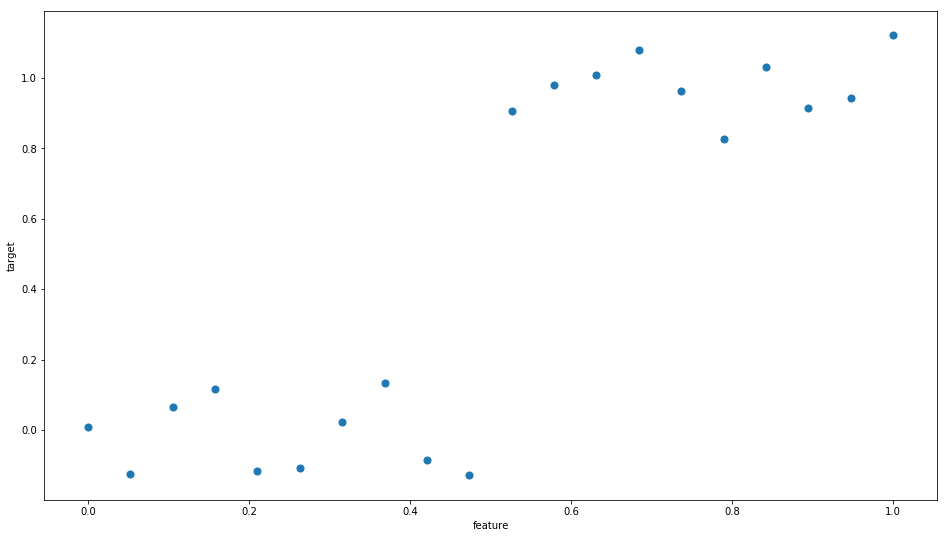

In [43]:
X_train = np.linspace(0, 1, 20) # мало точек, чтобы между точками были интервалы
X_test = np.linspace(0, 1, 1000) # много точек, чтобы получился график предсказаний

def target(x):
    return x > 0.5

Y_train = target(X_train) + np.random.randn(*X_train.shape) * 0.1

plt.figure(figsize = (16, 9))
plt.scatter(X_train, Y_train, s=50)
plt.xlabel("feature")
plt.ylabel("target")

Допишите функцию, которая берет на вход reg - объекта класса композиции (в качестве reg будет подаваться случайный лес или градиентный бустинг). Функция должна построить несколько графиков, каждый график визуализирует предсказания композиции из определенного числа деревьев. Следуйте комментариям в функции.

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, \
                             RandomForestRegressor
    
def train_and_plot(reg):
    plt.figure(figsize=(20, 30))
    sizes = [1, 2, 5, 20, 100, 500, 1000, 2000] # варианты числа деревьев
    for i, s in enumerate(sizes):
        reg.n_estimators = s # устанавливаем число деревьев
        plt.subplot(4, 2, i+1) # чтобы сделать много графиков
        plt.title('{} trees'.format(s)) # отмечаем число деревьев в названии графика
        ### далее ваш код
        # обучите reg по синим точам
        
        # сделайте предсказания для всего отрезка [0, 1], он хранится в X_test
        
        # нарисуйте синие точки с помощью scatter
        
        # постройте график предсказаний с помощью plot
        

Посмотрим, как изменяются предсказания случайного леса при увеличении числа деревьев:

In [ ]:
reg = RandomForestRegressor(warm_start=True)
train_and_plot(reg)

Можно заметить, что с некоторого момента итоговая функция перестает меняться с ростом количества деревьев.

Теперь проделаем то же самое для градинентного бустинга.

In [ ]:
reg = GradientBoostingRegressor(max_depth=1, \
                                learning_rate=1, \
                                warm_start=True)
train_and_plot(reg)

Градиентный бустинг довольно быстро построил истинную зависимость, после чего начал настраиваться уже на конкретные объекты обучающей выборки, из-за чего сильно переобучился.


Бороться с этой проблемой можно с помощью выбора очень простого базового алгоритма или
же искусственным снижением веса новых алгоритмов при помощи шага $\eta$:
$$a_N(x) = \sum_{n=0}^N \eta \gamma_N b_n(x).$$

Такая поправка замедляет обучение по сравнению с бэггингом, но зато позволяет получить менее переобученный алгоритм. Тем не менее, важно понимать, что переобучение всё равно будет иметь место при обучении сколь угодно большого количества базовых алгоритмов для фиксированного $\eta$.

In [ ]:
reg = GradientBoostingRegressor(max_depth=1, \
                                learning_rate=0.1, \
                                warm_start=True)
train_and_plot(reg)

С маленьким шагом градиентный бустинг переобучается медленнее, но при очень большом числе базовых алгоритмов все равно запоминает обучающую выборку.

Теперь проверим описанный выше эффект на реальных данных.

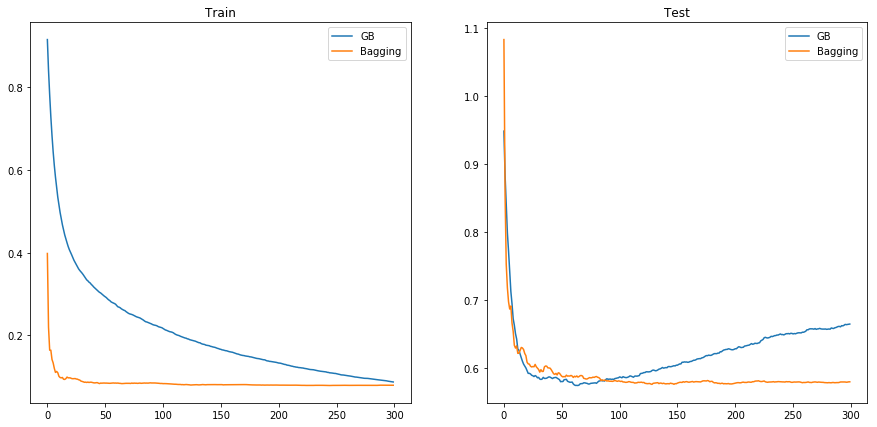

In [50]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

ds = datasets.load_diabetes()
X = ds.data
Y = ds.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, test_size=0.5)

MAX_ESTIMATORS = 300

gbclf = RandomForestRegressor(warm_start=True)
err_train_bag = []
err_test_bag = []
for i in range(1, MAX_ESTIMATORS+1):
    gbclf.n_estimators = i
    gbclf.fit(X_train, Y_train)
    err_train_bag.append(1 - gbclf.score(X_train, Y_train))
    err_test_bag.append(1 - gbclf.score(X_test, Y_test))
    
gbclf = GradientBoostingRegressor(warm_start=True, \
                                  max_depth=2, \
                                  learning_rate=0.1)
err_train_gb = []
err_test_gb = []
for i in range(1, MAX_ESTIMATORS+1):
    gbclf.n_estimators = i
    gbclf.fit(X_train, Y_train)
    err_train_gb.append(1 - gbclf.score(X_train, Y_train))
    err_test_gb.append(1 - gbclf.score(X_test, Y_test))
    
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(err_train_gb, label='GB')
plt.plot(err_train_bag, label='Bagging')
plt.legend()
plt.title('Train')
plt.subplot(1, 2, 2)
plt.plot(err_test_gb, label='GB')
plt.plot(err_test_bag, label='Bagging')
plt.legend()
plt.title('Test')
plt.gcf().set_size_inches(15, 7)